# Fingerprint Authentication Using Python

In this lab activity, you will obtain a slight intuition on how biometrics systems work in order to validate a person's fingerprint by using Python. Although this may seem far from "Systems Programming", it is important to recognise all the work that has to be developed in order to implement this type authentication.

# Importing the Necessary Modules

To do this activity, you need to have the following python modules installed in your computer:

* numpy
* matplotlib
* scikit-image
* opencv-python
* scipy

Remember that you can use the command "!pip install ..." to install these modules.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install opencv-python
!pip install scipy

Now, import the installed modules

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

# Importing and Preprocessing an Image

In moodle there are four images of fingerprints: Two for subject 101 (101_1.tif and 101_2.tif) and two for subject 102 (102_1.tif and 102_2.tif). The first step to create a fingerprint authentication system is to **Register** the users into the database. To do so, we will do the following:
* Load and "binarise" the image of the fingerprint.
* Skeletonise the binarised image.
* Extract the corner points of the fingerprint ridges.
* Extract the SIFT features of the corners.

## Loading and binarising the image

First, save the fingerprint images (in moodle) within the same folder as this notebook. You will use the command "cv2.imread" to import the image. This command takes two arguments: the name of the image, and the flag that indicates what type of image to load: 0 for grayscale and 1 for RGB. Usually, biometric images are treated in grayscale. Therefore, we will use the following setting:

* img = cv2.imread(**FULL NAME OF THE IMAGE INSIDE QUOTATION MARKS**, 0)

In [2]:
## Use this cell to write the code that will load a fingerprint image into variable "img".
img = cv2.imread('101_1.tif', 0)

Now the image has been imported to Python and has become a numpy array. If you request the variable "img", you will notice that the system will output an array instead of the image.

In [3]:
## Use this cell to print the numpy array containing the image "img".
print(img)

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]


Moreover, you can verify the size of the array by using the "shape" command.

In [4]:
## Use this cell to see the shape of the variable containg the image "img".
img.shape

(372, 245)

In case you want to see the array as an image, you can use the command :

* plt.imshow(img) 

followed by:

* plt.show()

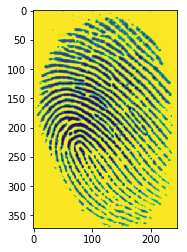

In [5]:
## Use this cell to visualise the image contained in the variable "img".
plt.imshow(img)
plt.show()

The image has been imported as an array of values that range from 0 (black) to 255 (white). In between, there are multiple shades of gray that may represent noisy pixels. Therefore, a cleaning process called "binarisation" is applied to the image in order to get rid of tis noise and to enhance the shape of the fingerprint. To do so, use the "cv2.threshold" command:

* ret, img_bin = cv2.threshold(img, 127, 255, 0)

The argumants of the function indicate that all pixels with a value higher than 127 will become 255, and that pixels with a value smaller than 127 will become 0.

In [6]:
## Use this cell to write the code that will binarise the fingerprint image creating variable "img_bin".
ret, img_bin = cv2.threshold(img, 127, 255, 0)

Now print "img_bin" to see that the array only includes values 0 and 255.

In [7]:
## Use this cell to print the numpy array representing the binarised image "img_bin".
print(img_bin)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Moreover, we can take a look at "img_bin" to see how the binarisation afects the image.

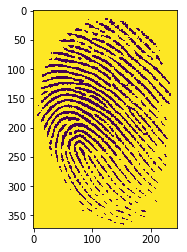

In [8]:
## Use this cell to visualise the binarised image contained in the variable "img_bin".
plt.imshow(img_bin)
plt.show()

## Skeletonisation

Now that the image has been binarised, we can apply a filter so that the ridges are thinned and it becomes easier to find the features. To do so, import the "skeletonize" module contained in scikit image morphoology package (skimage.morphology):

* from skimage.morphology import skeletonize

Then we convert the 255 into 1 (since the skeletonisation method works only if the matrix contains ones and zeroes):

* img_bin[img_bin == 255] = 1

And finally we apply the skeletonisation filter and create a new image called "img_skeleton":

* img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)

In [9]:
## Use this cell to write the code that will skeletonise the binarised fingerprint image.
from skimage.morphology import skeletonize
img_bin[img_bin == 255] = 1
img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)

Once again we can print the numpy array and visualise the image:

In [10]:
## Use this cell to print the numpy array representing the skeletonised image "img_skeleton".
print(img_skeleton)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


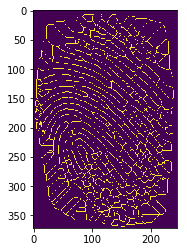

In [11]:
## Use this cell to visualise the skeletonised image contained in the variable "img_skeleton".
plt.imshow(img_skeleton)
plt.show()

## Findig the features

To find the feature points that describe the fingerprint, we will use two popular methods in image recognition: The first one is called Harris corners (which will transform the image into a Harris corner image with indexes describing how likely a pixel is to be a corner) and the second is Scale Invariant Feature Transform (SIFT), which will extract a vector of descriptor for each of the candidate corners.

### Harris corners

To generate the Harris corners image, use the following commands:

* img_harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
* img_harris_corners_normalized = cv2.normalize(img_harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

In [12]:
## Use this cell to write the code that will generate the normalised harris corners image from the skeletonised image.
img_harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
img_harris_corners_norm = cv2.normalize(img_harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

Notice that if we inspect the Harris corners image, we will notice that the corners are represented in lighter colours, having a larger value than pixels which are less likely to be true corners of the fingerprint image.

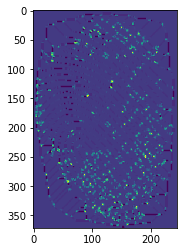

In [13]:
## Use this cell to visualise the normalised harris corners image contained in the variable "img_harris_corners_normalized".
plt.imshow(img_harris_corners_norm)
plt.show()

### SIFT descriptors

To find the descriptors for each corner, first we need to establish a **threshold value**. This means that if a pixel in the Harris corners image has a value larger than the threshold, then it is considered a true corner. We will set this threshold empirically as $125$. Then, we will scan the image for all rows and columns to find and extract the harris corner keypoints. Finally, we will extract the SIFT descriptors of each keypoint by using the $orb.create$ and the $orb.compute$ functions:

In [14]:
## Execute this code to find true harris corners and extract their SIFT descriptors
harris_threshold = 125
keys_101_1 = []
for x in range(0, img_harris_corners_norm.shape[0]):
    for y in range(0, img_harris_corners_norm.shape[1]):
        if img_harris_corners_norm[x][y] > harris_threshold:
            keys_101_1.append(cv2.KeyPoint(y, x, 1))
orb = cv2.ORB_create()
_, desc_101_1 = orb.compute(img, keys_101_1)

You can print the variable "desc_101_1" to inspect the features.

In [15]:
## Use this cell to print the descriptors of image 101_1.tif contained in variable "desc_101_1".
print(desc_101_1)

[[ 75 211  81 ... 178 170 189]
 [ 75 209  80 ... 182 170 157]
 [  9 122 179 ...  95   3 203]
 ...
 [ 93  29  23 ...  99  35 202]
 [ 20 159  23 ... 101  35  98]
 [148 171 183 ... 101  39  98]]


"desc_101_1" should be a numpy array with 1215 rows (each representing one true harris corner point) and 32 columns (each representing a feature). If you are interested to know more about what each of these 32 features represents, you can read the wiki entry for SIFT here:

https://en.wikipedia.org/wiki/Scale-invariant_feature_transform

In [16]:
## Use this cell to verify the shape of variable "desc_101_1".
desc_101_1.shape

(1215, 32)

## Enrolling the Remaining Images

Now that the keypoints and descriptors for image 101_1.tif are stored in variables keys_101_1 and desc_101_1 respectively, you can create a function called $enroll$ which you can simply call as many times as you need to extarct the descriptors of any fingerprint image.

In [17]:
## This cell provides a function that is being called three times an¡d enrolls the remaining 3 images.
def enroll(image_name):
    '''This function takes the name of the image as input and outputs the keypoints and descriptors.'''
    # Step 1: Load the fingerprint image
    img = cv2.imread(image_name, 0)
    # Step 2: Binarise the loaded image
    _, img_bin = cv2.threshold(img, 127, 255, 0)
    # Step 3: Skeletonise the binarised image
    img_bin[img_bin == 255] = 1
    img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)
    # Step 4: Generate the normalised harris corners image from the skeletonised image
    img_harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
    img_harris_corners_norm = cv2.normalize(img_harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
    # Step 5: Extract the SIFT features of the true harris corners with a threshold of 125
    harris_threshold = 125
    keys = []
    for x in range(0, img_harris_corners_norm.shape[0]):
        for y in range(0, img_harris_corners_norm.shape[1]):
            if img_harris_corners_norm[x][y] > harris_threshold:
                keys.append(cv2.KeyPoint(y, x, 1))
    orb = cv2.ORB_create()
    _, desc = orb.compute(img, keys)
    return keys, desc

# Call the enroll function three times
keys_101_2, desc_101_2 = enroll('101_2.tif')
keys_102_1, desc_102_1 = enroll('102_1.tif')
keys_102_2, desc_102_2 = enroll('102_2.tif')

## Matching Fingerprints

Now that we have all keypoints and descriptors for each fingerprint, we will use a **brute force matching** method that will attempt to find the best mapping between a pair of fingerprints. To do so, we will create a function called $enroll-match$ that enrolls and matches two given images:

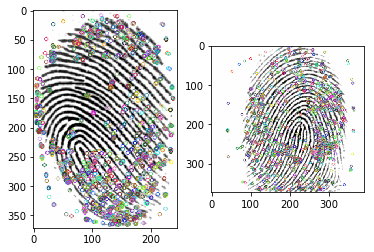

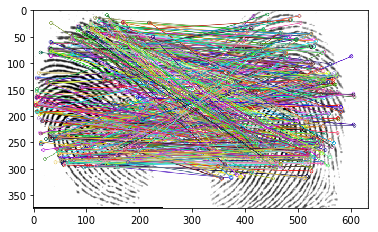

In [18]:
## This cell provides a function that enrolls and matches two given fingerprint images.
def enroll_match(image_nameA, image_nameB):
    '''This function enrolls two fingerprints and matches them using a brute force method.'''
    keysA, descA = enroll(image_nameA)
    keysB, descB = enroll(image_nameB)
    imgA = cv2.imread(image_nameA, 1)
    imgB = cv2.imread(image_nameB, 1)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    match = sorted(bf.match(descA, descB), key= lambda match:match.distance)
    # Plot keypoints
    imgA_keys = cv2.drawKeypoints(imgA, keysA, outImage=None)
    imgB_keys = cv2.drawKeypoints(imgB, keysB, outImage=None)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(imgA_keys)
    axarr[1].imshow(imgB_keys)
    plt.show()
    # Plot matches
    img_match = cv2.drawMatches(imgA, keysA, imgB, keysB, match, flags=2, outImg=None)
    plt.imshow(img_match)
    plt.show()
    return match

# Call the function
match = enroll_match('101_1.tif', '102_2.tif')

## Evaluate the "goodness" of the match

As commented before, the key of biometrics is that you can never guarantee an exact match (unless you are comparing the same two images), but rather you are matching two images and declaring if they belong to the same subject or not based on a score threshold. This score is calculated based on the distance between one matched feature and the other. Moreover, the score threshold is set empirically based on previous experiments

For this example, we will set the acceptance threshold equal to 73. This means that if the matching obtains a score of 73 or lower, then the two fingerprints are of the same person, and if the value is higher, then the fingerprints don't match.

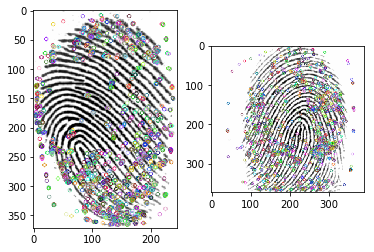

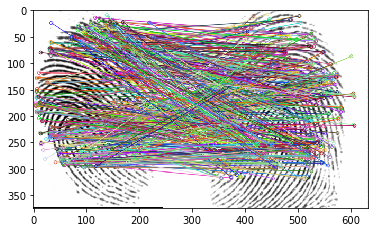

Score is 73.7090909090909
Fingerprint does not match.


In [20]:
## This cell provides a function that analyses the "score" of a match and deduces if the images are the same or not.
def score(match):
    '''This function takes a math and returns the visualisation of the matching and a decision of the match.'''
    score = 0
    score_threshold = 73
    for ma in match:
        score += ma.distance
    score = score/len(match)
    print('Score is', score)
    if score < score_threshold:
        print("Fingerprint matches.")
    else:
        print("Fingerprint does not match.")
    return

## Run all functions
match = enroll_match('101_1.tif', '102_2.tif')
score(match)

**TASK 1**: Create a single function called $matchFingerprint$ which includes $enroll$, $enroll-match$ and $score$. Moreover, allow $harris-threshold$ and $score-threshold$ to be parameters of this function so that they can be changed by the user.

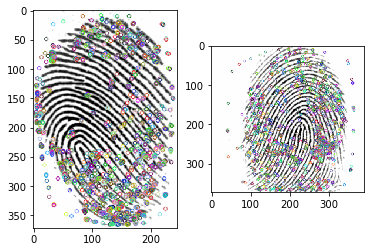

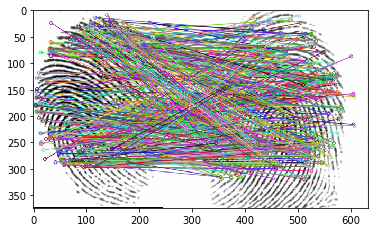

Score is 73.7090909090909
Fingerprint matches.


In [21]:
## Use this cell to implement the matchFingerprint function.
def enroll(image_name, harris_threshold):
    '''This function takes the name of the image as input and outputs the keypoints and descriptors.'''
    # Step 1: Load the fingerprint image
    img = cv2.imread(image_name, 0)
    # Step 2: Binarise the loaded image
    _, img_bin = cv2.threshold(img, 127, 255, 0)
    # Step 3: Skeletonise the binarised image
    img_bin[img_bin == 255] = 1
    img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)
    # Step 4: Generate the normalised harris corners image from the skeletonised image
    img_harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
    img_harris_corners_norm = cv2.normalize(img_harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
    # Step 5: Extract the SIFT features of the true harris corners with a threshold of 125
    keys = []
    for x in range(0, img_harris_corners_norm.shape[0]):
        for y in range(0, img_harris_corners_norm.shape[1]):
            if img_harris_corners_norm[x][y] > harris_threshold:
                keys.append(cv2.KeyPoint(y, x, 1))
    orb = cv2.ORB_create()
    _, desc = orb.compute(img, keys)
    return keys, desc

def enroll_match(image_nameA, image_nameB, harris_threshold):
    keysA, descA = enroll(image_nameA, harris_threshold)
    keysB, descB = enroll(image_nameB, harris_threshold)
    imgA = cv2.imread(image_nameA, 1)
    imgB = cv2.imread(image_nameB, 1)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    match = sorted(bf.match(descA, descB), key= lambda match:match.distance)
    # Plot keypoints
    imgA_keys = cv2.drawKeypoints(imgA, keysA, outImage=None)
    imgB_keys = cv2.drawKeypoints(imgB, keysB, outImage=None)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(imgA_keys)
    axarr[1].imshow(imgB_keys)
    plt.show()
    # Plot matches
    img_match = cv2.drawMatches(imgA, keysA, imgB, keysB, match, flags=2, outImg=None)
    plt.imshow(img_match)
    plt.show()
    return match

def score(match, score_threshold):
    score = 0
    for ma in match:
        score += ma.distance
    score = score/len(match)
    print('Score is', score)
    if score < score_threshold:
        print("Fingerprint matches.")
    else:
        print("Fingerprint does not match.")
    return

def matchFingerprint(image_nameA, image_nameB, harris_threshold, score_threshold):
    match = enroll_match(image_nameA, image_nameB, harris_threshold)
    score(match, score_threshold)
    return

## With a single instruction now we can call all the functionalities
matchFingerprint('101_1.tif', '102_2.tif', harris_threshold = 125, score_threshold = 74)

**TASK 2**: Modify the previous code to show ony the "valid" matches (mappings where the score is smaller than $score-threshold$).

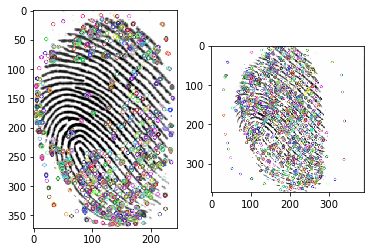

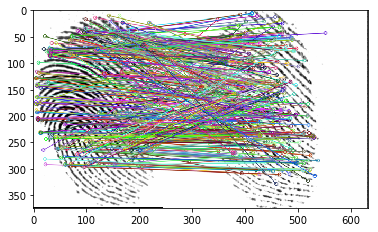

Score is 52.919402985074626
Fingerprint matches.


In [22]:
## Use this cell to implement the matchFingerprint function with the capability of only showing valid matches.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import skeletonize

def enroll(image_name, harris_threshold):
    '''This function takes the name of the image as input and outputs the keypoints and descriptors.'''
    # Step 1: Load the fingerprint image
    img = cv2.imread(image_name, 0)
    # Step 2: Binarise the loaded image
    _, img_bin = cv2.threshold(img, 127, 255, 0)
    # Step 3: Skeletonise the binarised image
    img_bin[img_bin == 255] = 1
    img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)
    # Step 4: Generate the normalised harris corners image from the skeletonised image
    img_harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
    img_harris_corners_norm = cv2.normalize(img_harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
    # Step 5: Extract the SIFT features of the true harris corners with a threshold of 125
    keys = []
    for x in range(0, img_harris_corners_norm.shape[0]):
        for y in range(0, img_harris_corners_norm.shape[1]):
            if img_harris_corners_norm[x][y] > harris_threshold:
                keys.append(cv2.KeyPoint(y, x, 1))
    orb = cv2.ORB_create()
    _, desc = orb.compute(img, keys)
    return keys, desc

def enroll_match(image_nameA, image_nameB, harris_threshold, score_threshold, showTrueMatches):
    keysA, descA = enroll(image_nameA, harris_threshold)
    keysB, descB = enroll(image_nameB, harris_threshold)
    imgA = cv2.imread(image_nameA, 1)
    imgB = cv2.imread(image_nameB, 1)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    match = sorted(bf.match(descA, descB), key= lambda match:match.distance)
    # Plot keypoints
    imgA_keys = cv2.drawKeypoints(imgA, keysA, outImage=None)
    imgB_keys = cv2.drawKeypoints(imgB, keysB, outImage=None)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(imgA_keys)
    axarr[1].imshow(imgB_keys)
    plt.show()
    # Plot matches
    if showTrueMatches == True:
        ## with this code you only plot the matches that are potentially true
        match_true = []
        for ma in match:
            if ma.distance < score_threshold:
                match_true.append(ma)
        img_match = cv2.drawMatches(imgA, keysA, imgB, keysB, match_true, flags=2, outImg=None)
    else:
        img_match = cv2.drawMatches(imgA, keysA, imgB, keysB, match, flags=2, outImg=None)
    plt.imshow(img_match)
    plt.show()
    return match

def score(match, score_threshold):
    score = 0
    for ma in match:
        score += ma.distance
    score = score/len(match)
    print('Score is', score)
    if score < score_threshold:
        print("Fingerprint matches.")
    else:
        print("Fingerprint does not match.")
    return

def matchFingerprint(image_nameA, image_nameB, harris_threshold, score_threshold, showTrueMatches):
    match = enroll_match(image_nameA, image_nameB, harris_threshold, score_threshold, showTrueMatches)
    score(match, score_threshold)
    return

## With a single instruction now we can call all the functionalities
matchFingerprint('101_1.tif', '101_2.tif', harris_threshold = 125, score_threshold = 60, showTrueMatches = True)

Notice that less mappings are shown now in comparison to the previous example.